In [32]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce 
import codecs
import statsmodels.api as sm
import datetime

COVID-19 cases in hospital and ICU, by Ontario Health (OH) region https://data.ontario.ca/dataset/covid-19-cases-in-hospital-and-icu-by-ontario-health-region

DataDictionary:

date
OH region
current hospitalizations with COVID-19
current patients in Intensive Care Units (ICUs) due to COVID-related critical Illness
current patients in Intensive Care Units (ICUs) testing positive for COVID
current patients in Intensive Care Units (ICUs) no longer testing positive for COVID
current patients in Intensive Care Units (ICUs) on ventilators due to COVID-related critical illness
current patients in Intensive Care Units (ICUs) on ventilators testing positive for COVID
current patients in Intensive Care Units (ICUs) on ventilators no longer testing positive for COVID



## Load the Government of Ontario COVID-19 Public Dataset 


In [33]:
def load_data(path, dataset):
    data_y = pd.read_csv(path+dataset+'.csv', skiprows=0)

    return data_y

def preprocess_df(df, date_to_use):
    #Remove sketchy last value from time-series that is only half populated
    df_preprocessed = df[:-1]

    #Set up time as datetime and index
    df_preprocessed['DATE'] = pd.to_datetime(df_preprocessed[date_to_use])

    
    return df_preprocessed

    
def deseasonalize_df(df):

    #Deseasonalize and detrend each time-series
    #Sample to take monthly average 
    data_x = df['Row_ID'].resample('W').mean()

    #Extract annual seasonality, trend, and residual
    print('Seasonality for COVID-19 confirmed cases data (using weekly time interval)')
    decomposition = sm.tsa.seasonal_decompose(data_x, model='multiplicative', extrapolate_trend=True, freq=7)
    fig = decomposition.plot()
    plt.show()

    #Add the residual for each
    df['Row_ID_resid'] = decomposition.resid

    return df 





In [34]:
DATA_FOLDER = "../raw_data/Datasets/COVID19_Ontario/"


/tmp/ipykernel_3246/743533785.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocessed['DATE'] = pd.to_datetime(df_preprocessed[date_to_use])


NameError: name 'metric' is not defined

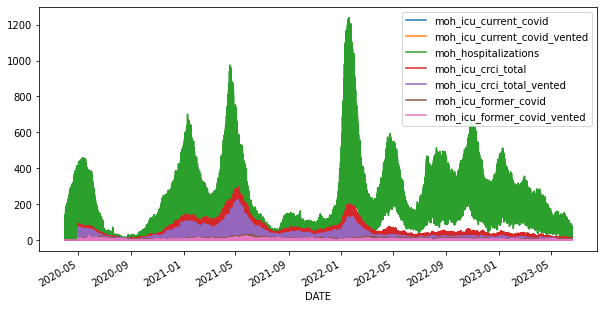

In [35]:

#Load data
dataset = "region_hospital_icu_covid_data"
df = load_data(DATA_FOLDER, dataset)

# #Convert to datetime and decided to use "Accurate_Episode_Date"
df_preprocessed = preprocess_df(df, 'date')
df_preprocessed = df_preprocessed.set_index('DATE')

df_preprocessed = df_preprocessed.drop(columns={'date', 'oh_region'})

df_preprocessed = df_preprocessed.rename(columns={old_name: 'moh_' + old_name for old_name in df_preprocessed.columns})

# # #Aggregate by date
# # #Get the total counts for days for the different contact_methods 
# date_df = df_preprocessed.resample('W-SUN').sum()


# #Plot 
df_preprocessed.plot()
plt.title('{} Numbers (not corrected)'.format(metric))
plt.rcParams['figure.figsize'] = [10,5]
plt.show()


In [ ]:
df_preprocessed.to_csv('../processed_data_inputs/COVID19.csv')


In [36]:
df_preprocessed.columns + 'moh'

Index(['moh_icu_current_covidmoh', 'moh_icu_current_covid_ventedmoh',
       'moh_hospitalizationsmoh', 'moh_icu_crci_totalmoh',
       'moh_icu_crci_total_ventedmoh', 'moh_icu_former_covidmoh',
       'moh_icu_former_covid_ventedmoh'],
      dtype='object')